In [1]:
import numpy as np
np.random.seed(123) 
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten  
from keras.layers import Convolution2D, MaxPooling2D 

from keras.utils import np_utils

from keras.datasets import mnist 

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

In [3]:
model = Sequential()

model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1))) 
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [4]:
%%time
hist = model.fit(X_train, Y_train, batch_size=32, epochs=12, verbose=1)

Epoch 1/12
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4065 - accuracy: 0.8711
Epoch 2/12
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0910 - accuracy: 0.9728
Epoch 3/12
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0642 - accuracy: 0.9804
Epoch 4/12
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0550 - accuracy: 0.9834
Epoch 5/12
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0460 - accuracy: 0.9864
Epoch 6/12
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0409 - accuracy: 0.9867
Epoch 7/12
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0390 - accuracy: 0.9874
Epoch 8/12
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0332 - accuracy: 0.9892
Epoch 9/12
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0303 - accuracy: 0.9904
Epoch 10/12
1875/1875 [==============================] - 4s 2ms/step - loss: 0.029

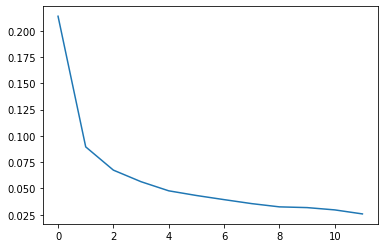

In [5]:
plt.plot(hist.history["loss"])